In [1]:
from pfs.detAnalysis import *
from pfs.detFocusAnalysis import *
from pfs.fileHandling import *
from pfs.style import *
from pfs.instrModelAlign import peakdet

In [2]:
from astropy.convolution import Box2DKernel
from astropy.convolution import convolve

In [3]:
#%matplotlib widget

import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from matplotlib import style
style.use('ggplot')

In [41]:
doSavePlot = True

In [73]:
imgPath = '/home/fmadec/Pictures/analysis/'
imgPath = '/media/fmadec/PfsData/PFS/fmadec/analysis/subaru/sm1/'

In [6]:
drpPath = "/home/fmadec/pfs/subaruData"

In [46]:
experimentId = 156 #155 #1370
cam = 'b1'

In [47]:
repo = "drp"  # relative path to /drp : None by default
rerun = "sm1-march2020-dark"

In [48]:
filelist = constructFilelist(experimentId, rerun=rerun, repo=repo, basePath=drpPath, subaru=True)
filelist = filelist.query(f"cam == '{cam}'").reset_index()

print(filelist.filepath[0])

/home/fmadec/pfs/subaruData/drp/rerun/sm1-march2020-dark/detrend/calExp/2020-04-14/v001863/calExp-SA001863b1.fits


In [49]:
#filelist = constructFilelist(experimentId, repo=repo, rerun=rerun, )

filelist = filelist.query(f"cam == '{cam}'").reset_index()
num = 2
filenames = filelist.filepath[num]
visit = filelist.visitId[num]

In [50]:
duplicate = len(filelist)

In [51]:
filelist

,level_0,index,filepath,experimentId,cam,obsdate,visitId
0,0,0,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,156,b1,2020-04-14,1863
1,1,2,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,156,b1,2020-04-14,1864
2,2,5,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,156,b1,2020-04-14,1865
3,3,7,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,156,b1,2020-04-14,1866
4,4,9,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,156,b1,2020-04-14,1867


In [52]:
plotfile = f"SM1_lightleakage_{filelist.cam[0]}_Exp{experimentId}_{visit}"

print(plotfile)

SM1_lightleakage_b1_Exp156_1865


In [53]:
plotfile = f"SM1_lightleakage_{filelist.cam[0]}_Exp{experimentId}"

print(plotfile)

SM1_lightleakage_b1_Exp156


In [54]:
print(filenames)

/home/fmadec/pfs/subaruData/drp/rerun/sm1-march2020-dark/detrend/calExp/2020-04-14/v001865/calExp-SA001865b1.fits


In [55]:
hdulist = fits.open(filenames)
data = hdulist[1].data

In [56]:
data.mean()
np.median(data)
from scipy import stats
stats.describe(data[0])

DescribeResult(nobs=4096, minmax=(-11.552214, 3059.5105), mean=3.101474, variance=4332.4707, skewness=35.383323669433594, kurtosis=1443.4553837399496)

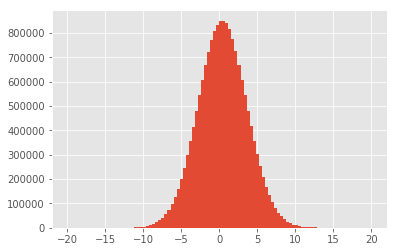

In [57]:
histogram = plt.hist(data.ravel(), bins=100, range=(-20,20))

In [58]:
from astropy.stats import sigma_clip
filtered_data = sigma_clip(data, sigma=5, maxiters=3)

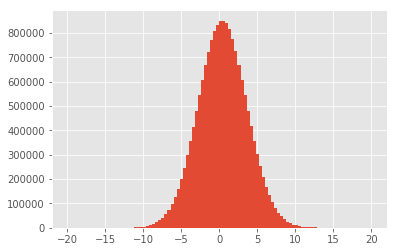

In [59]:
histogram = plt.hist(filtered_data.flatten(), bins=100, range=(-20,20))

In [60]:
#carte de moyenne de 100pix de cote pour ne plus voir le bruit

In [61]:
exptime = getFitsKey(filenames,'exptime')
print(f"Exptime {exptime}s")

Exptime 1800.0s


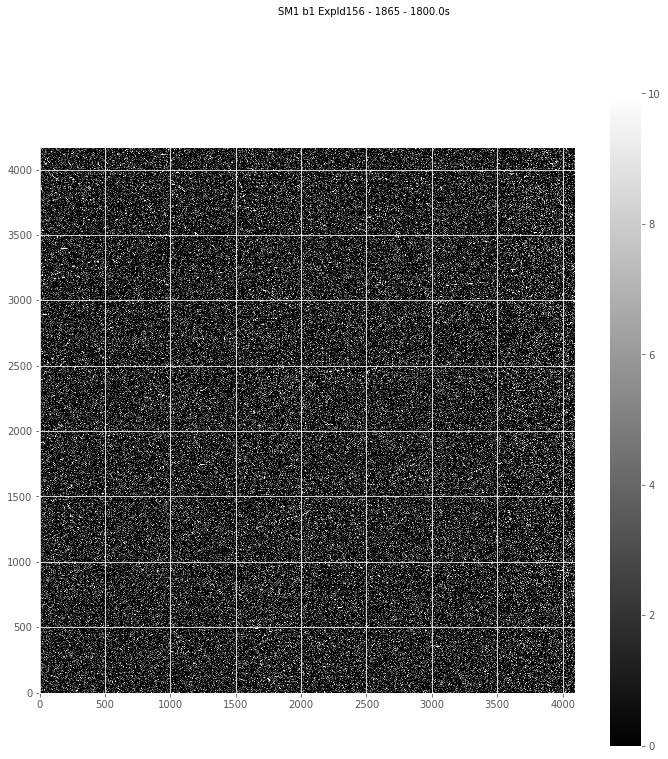

In [76]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(data, origin='lower', cmap='gray', vmin=0, vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s', fontsize=10)
plt.colorbar()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

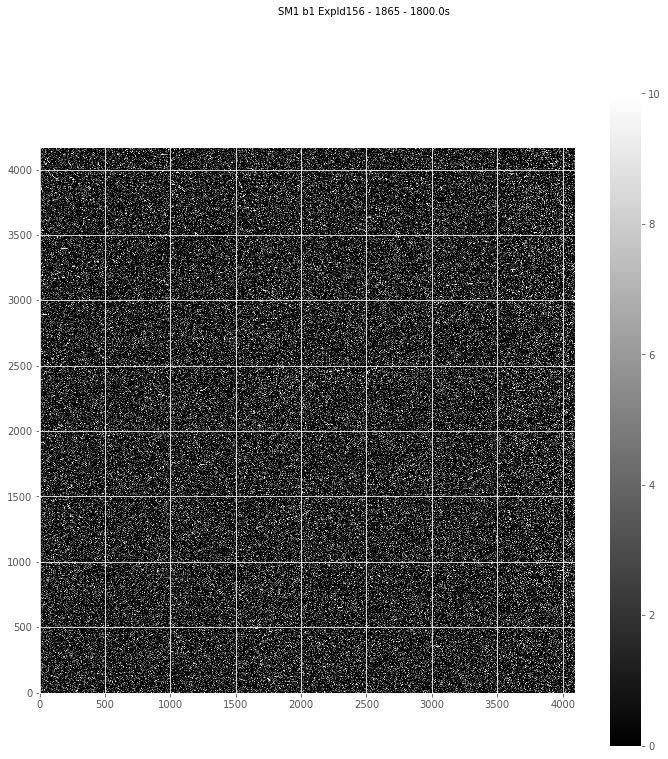

In [63]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(filtered_data, origin='lower', cmap='gray', vmin=0, vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s', fontsize=10)
plt.colorbar()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

In [64]:
kernel = Box2DKernel(100)

astropy_conv = convolve(filtered_data, kernel)

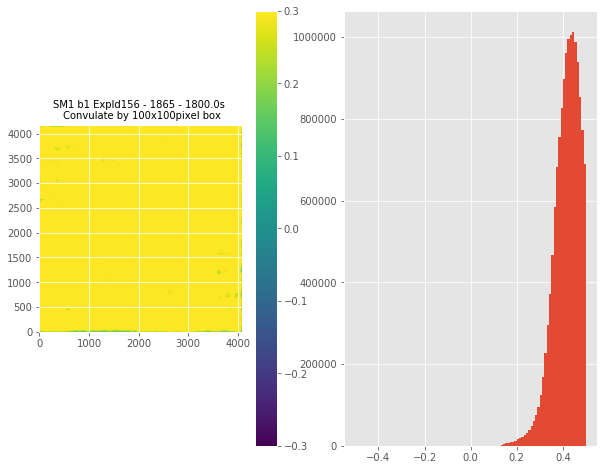

In [65]:
fig = plt.figure(figsize=(10, 8))
a = fig.add_subplot(1, 2, 1)
im = plt.imshow(astropy_conv, vmin=-0.3, vmax=0.3, origin='lower')
a.set_title(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s \n Convulate by 100x100pixel box', fontsize=10)
plt.colorbar()
a = fig.add_subplot(1, 2, 2)
imgplot = plt.hist(astropy_conv.ravel(), bins=100, range=(-0.5,0.5))
#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

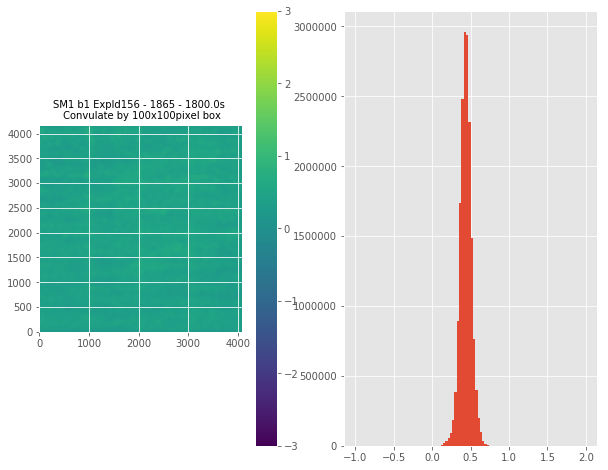

In [66]:
fig = plt.figure(figsize=(10, 8))
a = fig.add_subplot(1, 2, 1)
im = plt.imshow(astropy_conv, vmin=-3, vmax=3, origin='lower')
a.set_title(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s \n Convulate by 100x100pixel box', fontsize=10)
plt.colorbar()
a = fig.add_subplot(1, 2, 2)
imgplot = plt.hist(astropy_conv.ravel(), bins=100, range=(-1,2))
#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

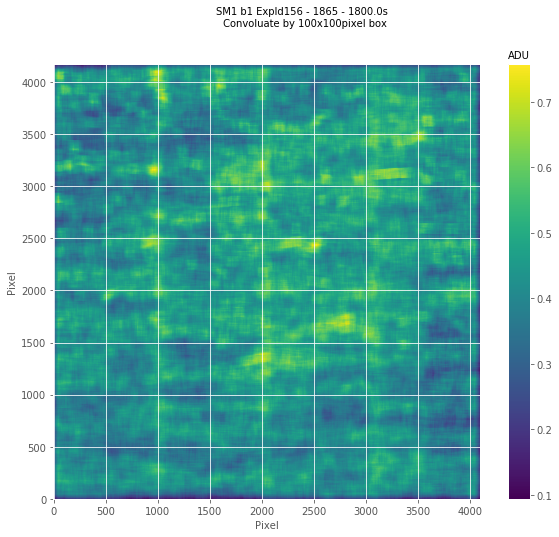

In [74]:
fig = plt.figure(figsize=(10, 8))
#im = plt.imshow(astropy_conv, vmin=-0.3, vmax=0.3, origin='lower')
im = plt.imshow(astropy_conv, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('ADU', fontsize=10)
#im = plt.imshow(astropy_conv, origin='lower')
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s \n Convoluate by 100x100pixel box', fontsize=10)
plt.xlabel('Pixel', fontsize=10)
plt.ylabel('Pixel', fontsize=10)

if doSavePlot:
    fig.savefig(imgPath+plotfile+".png")
#ax4.set_xticklabels([])
#ax4.set_yticklabels([])

In [ ]:
np.min(astropy_conv)

In [68]:
# 
spec = 1*10**(-3) #photon/px/s
goal = 3*10**(-4) #photon/px/s

bgain = 1.2 if cam == "r1" else 1.4 #cam = b1
#exptime=600 #s

spec_adu = (spec*exptime)/bgain #ADU /px
goal_adu =  (goal*exptime)/bgain #ADU /px
print(f"spec {spec_adu} ADU/px")

spec 1.2857142857142858 ADU/px


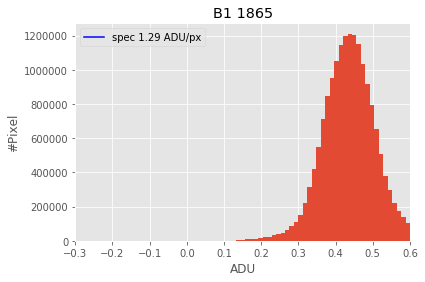

In [69]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100,range=(-0.6,0.6))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
#if cam == "b1" : 
#    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(cam.upper()+" " + str(visit))
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0.3,0.6)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png")

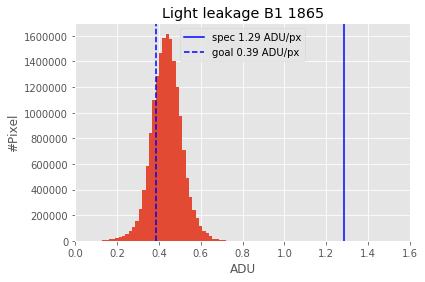

In [75]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100,range=(-0,1.6))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if cam == "b1" : 
    plt.axvline(x=goal_adu,label=f"goal {goal_adu:.2f} ADU/px", c="blue", ls="--" )
plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title("Light leakage "+cam.upper()+" " + str(visit))
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0,1.6)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png")

In [ ]:
print(np.median(astropy_conv))
print(astropy_conv.mean())

In [ ]:
astropy_conv.mean()

In [ ]:
image_concat = []
for image in filelist.filepath:
    image_concat.append(fits.getdata(image))

In [ ]:
for image in image_concat:
    print(image.mean())

In [ ]:
ntot = filelist.filepath.count()
visit_start = filelist.visitId[0]
visit_end = filelist.visitId.iloc[-1]
print(f"nb Images {ntot} - visit {visit_start}..{visit_end}")

In [ ]:
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image

final_image = final_image / tot

In [ ]:
np.medianian()

In [ ]:
from astropy.stats import sigma_clip
filtered_data = sigma_clip(data, sigma=2, maxiters=5)

In [ ]:
astropy_conv2 = convolve(final_image, kernel)

In [ ]:
fig = plt.figure()
#im = plt.imshow(astropy_conv, vmin=-0.3, vmax=0.3, origin='lower')
im = plt.imshow(astropy_conv2, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('ADU', fontsize=10)
#im = plt.imshow(astropy_conv, origin='lower')
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {str(visit_start)}...{str(visit_end)} - {exptime}s \n Convoluate by 100x100pixel box', fontsize=10)
plt.xlabel('Pixel', fontsize=10)
plt.ylabel('Pixel', fontsize=10)
if doSavePlot:
    fig.savefig(imgPath+plotfile+"all.png", bbox_inches = "tight")
#ax4.set_xticklabels([])
#ax4.set_yticklabels([])

In [ ]:
show_goal = False

In [ ]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist((astropy_conv2/ntot).ravel(), bins=100,range=(-0.2,0.5))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if (cam == "b1") & show_goal : 
    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
    plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(f"{cam.upper()}  {str(visit_start)}...{str(visit_end)} - {exptime}s")
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0.1,0.5)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png", bbox_inches = "tight")

In [ ]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist((astropy_conv).ravel(), bins=100,range=(-0.6,0.6))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if (cam == "b1") & show_goal : 
    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
    plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(f"{cam.upper()}  {str(visit)} - {exptime}s")
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0.3,0.6)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png", bbox_inches = "tight")

In [ ]:
print(f"Mean: {astropy_conv2.mean()/ntot}")
print(f"Median: {np.median(astropy_conv2)/ntot}")

In [ ]:
plt.figure()
#im = plt.imshow(astropy_conv, vmin=-2., vmax=2.e1, origin='lower')
im = plt.imshow(final_image,vmin=-0.5, vmax=0.5, origin='lower')

In [ ]:
print(f"Mean: {final_image.mean()/ntot}")
print(f"Median: {np.median(final_image)/ntot}")

In [ ]:
final_image.mean()/3

In [ ]:
summ = final_image.sum(axis=1)

In [ ]:
plt.figure()
plt.plot(summ)

In [ ]:
summ.mean()/4000/3

In [ ]:
medianFrame = np.median(image_concat, axis=0).astype(dtype=np.uint8)

In [ ]:
medianFrame = np.median(image_concat, axis=0)

In [ ]:
meanFrame = np.mean(image_concat, axis=0)

In [ ]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
#n, bins, patches = plt.hist((medianFrame).ravel(), bins=100,range=(-0.6,0.6))
n, bins, patches = plt.hist((medianFrame).ravel(), bins=100)

#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if (cam == "b1") & show_goal : 
    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
    plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(f"{cam.upper()}  {str(visit)} - {exptime}s")
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
#plt.xlim(-200,200)
plt.legend()
#fig.savefig(imgPath+plotfile+"_Hist.png", bbox_inches = "tight")

In [ ]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(medianFrame, origin='lower', cmap='gray', vmin=0, vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - median - {exptime}s', fontsize=10, )
plt.colorbar()
#fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

In [ ]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(meanFrame, origin='lower', cmap='gray', vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s', fontsize=10, )
plt.colorbar()
#fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

In [ ]:
fig.sup

In [ ]:
4.5